In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from scipy.stats import pearsonr

In [100]:
Shotspotter = pd.read_csv(
    r"C:\Users\abelma2\Desktop\MASTERS\SPRING 2025\ACE592\ACE592_FinalProject\data\Violence_Reduction_-_Shotspotter_Alerts_-_Historical_20250408.csv")

dtype_mapping = {
    "LATITUDE": "float64",
    "LONGITUDE": "float64",
    "COMMUNITY_AREA": "str"
}

crime = pd.read_csv(
    r"C:\Users\abelma2\Desktop\MASTERS\SPRING 2025\ACE592\ACE592_FinalProject\data\Violence_Reduction_-_Victims_of_Homicides_and_Non-Fatal_Shootings_20250513.csv",
    dtype=dtype_mapping,
    low_memory=False
)

In [101]:

Shotspotter["DATE"] = pd.to_datetime(Shotspotter["DATE"], format="%m/%d/%Y %I:%M:%S %p")
Shotspotter_range = Shotspotter[(Shotspotter["DATE"] <= '2023-12-31')].copy()
selected_neighborhoods = ['Austin', 'Humboldt Park', 'North Lawndale', 'Englewood', 'West Englewood', 'South Shore']
Shotspotter_range.loc[:, "COMMUNITY_AREA"] = Shotspotter_range["COMMUNITY_AREA"].str.title()
Shotspotter_six_hoods = Shotspotter_range[Shotspotter_range['COMMUNITY_AREA'].isin(selected_neighborhoods)].copy()

Shotspotter_six_hoods["Year"] = Shotspotter_six_hoods["DATE"].dt.year
Shotspotter_six_hoods["Month"] = Shotspotter_six_hoods["DATE"].dt.month
Shotspotter_six_hoods["Day"] = Shotspotter_six_hoods["DATE"].dt.day
Shotspotter_six_hoods["Hour"] = Shotspotter_six_hoods["DATE"].dt.hour
Shotspotter_six_hoods["Minute"] = Shotspotter_six_hoods["DATE"].dt.minute

Shotspotter_six_hoods.rename(columns={
    "DATE": "Date",
    "COMMUNITY_AREA": "Community",
    "INCIDENT_TYPE_DESCRIPTION": "Incident Type Description",
    "LATITUDE": "Latitude",
    "LONGITUDE": "Longitude",
    "LOCATION": "Location"
}, inplace=True)

Shotspotter_six_hoods = Shotspotter_six_hoods.loc[:, [
    'Date', 'Community', 'Year', 'Month', 'Day', 'Hour', 'Minute', 
    'Incident Type Description', 'Latitude', 'Longitude', 'Location'
]].sort_values(by='Date').reset_index(drop=True)

westside_hoods = ['Austin', 'Humboldt Park', 'North Lawndale']
southside_hoods = ['Englewood', 'West Englewood', 'South Shore']

Shotspotter_westside = Shotspotter_six_hoods[Shotspotter_six_hoods['Community'].isin(westside_hoods)].copy()
Shotspotter_southside = Shotspotter_six_hoods[Shotspotter_six_hoods['Community'].isin(southside_hoods)].copy()

neighborhoods = {
    'Austin': Shotspotter_westside,
    'Humboldt Park': Shotspotter_westside,
    'North Lawndale': Shotspotter_westside,
    'Englewood': Shotspotter_southside,
    'West Englewood': Shotspotter_southside,
    'South Shore': Shotspotter_southside
}


Shotspotter_six_hoods.to_csv(r"C:\Users\abelma2\Desktop\MASTERS\SPRING 2025\ACE592\ACE592_FinalProject\clean_data\Shotspotter_six_hoods.csv", index=False)

In [102]:
shot_dates = {}

for hood, df in neighborhoods.items():

    hood_data = df[df['Community'] == hood]

    first_shot_date = hood_data.iloc[0]["Date"]
    last_shot_date = hood_data.iloc[-1]["Date"]
    start_date = first_shot_date - (last_shot_date - first_shot_date)
    duration_str = f"{(last_shot_date - first_shot_date).days // 365} years, " \
               f"{((last_shot_date - first_shot_date).days % 365) // 30} months, " \
               f"{((last_shot_date - first_shot_date).days % 365) % 30} days"
    
    shot_dates[hood] = {
        'Start Date': start_date,
        'First Shot Date': first_shot_date,
        'Last Shot Date': last_shot_date,
        'Duration': duration_str,
    }

pd.DataFrame(shot_dates)

,Austin,Humboldt Park,North Lawndale,Englewood,West Englewood,South Shore
Start Date,2010-05-31 07:28:21,2010-02-09 23:36:33,2010-04-26 08:49:44,2010-01-27 05:50:57,2010-01-29 06:15:12,2012-03-02 09:38:55
First Shot Date,2017-03-16 02:59:47,2017-01-19 23:47:25,2017-02-26 04:43:40,2017-01-13 02:48:16,2017-01-14 01:36:24,2018-01-30 16:45:11
Last Shot Date,2023-12-30 22:31:13,2023-12-30 23:58:17,2023-12-30 00:37:36,2023-12-30 23:45:35,2023-12-30 20:57:36,2023-12-30 23:51:27
Duration,"6 years, 9 months, 20 days","6 years, 11 months, 16 days","6 years, 10 months, 7 days","6 years, 11 months, 22 days","6 years, 11 months, 21 days","5 years, 11 months, 5 days"


In [103]:
crime["DATE"] = pd.to_datetime(crime["DATE"], format="%m/%d/%Y %I:%M:%S %p")

murders = crime[(crime["VICTIMIZATION_PRIMARY"] == "HOMICIDE") & 
                (crime["GUNSHOT_INJURY_I"] == "YES") & 
                (crime["DATE"] >= '2009-01-01') & 
                (crime["DATE"] <= '2023-12-31')].copy()

murders.loc[:, "COMMUNITY_AREA"] = murders["COMMUNITY_AREA"].str.title()

murders.rename(columns={
    "DATE": "Date",
    "COMMUNITY_AREA": "Community",
    "LATITUDE": "Latitude",
    "LONGITUDE": "Longitude",
    "LOCATION": "Location",
    "AGE": "Age",
    "SEX": "Sex",
    "RACE": "Race"
}, inplace=True)

murders["Year"] = murders["Date"].dt.year
murders["Month"] = murders["Date"].dt.month
murders["Day"] = murders["Date"].dt.day
murders["Hour"] = murders["Date"].dt.hour
murders["Minute"] = murders["Date"].dt.minute

yearly_homicides = murders.groupby(['Year', 'Community']).size().reset_index(name='Homicide Count')

top_10_neighborhoods_per_year = (
    yearly_homicides.groupby('Year', group_keys=False)
    .apply(lambda x: x.nlargest(5, 'Homicide Count')[['Year', 'Community', 'Homicide Count']])
    .reset_index(drop=True)
)

community_name_counts = top_10_neighborhoods_per_year['Community'].value_counts()

selected_neighborhoods = ['Austin', 'Humboldt Park', 'North Lawndale', 'Englewood', 'West Englewood', 'South Shore']

crime_six_hoods = murders[murders['Community'].isin(selected_neighborhoods)].copy()

crime_six_hoods = crime_six_hoods.loc[:, [
    'Date', 'Community', 'Year', 'Month', 'Day', 'Hour', 'Minute',
    "Age", "Sex", "Race", 'Latitude', 'Longitude', 'Location', "ZIP_CODE"
]].sort_values(by='Date').reset_index(drop=True)

crime_six_hoods.to_csv(r"C:\Users\abelma2\Desktop\MASTERS\SPRING 2025\ACE592\ACE592_FinalProject\clean_data\Homicide_six_hoods.csv", index=False)

C:\Users\abelma2\AppData\Local\Temp\ipykernel_43172\2605405071.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'Homicide Count')[['Year', 'Community', 'Homicide Count']])


Plots of Data

In [104]:
dir_path = r"C:\Users\abelma2\Desktop\MASTERS\SPRING 2025\ACE592\ACE592_FinalProject\Plots"


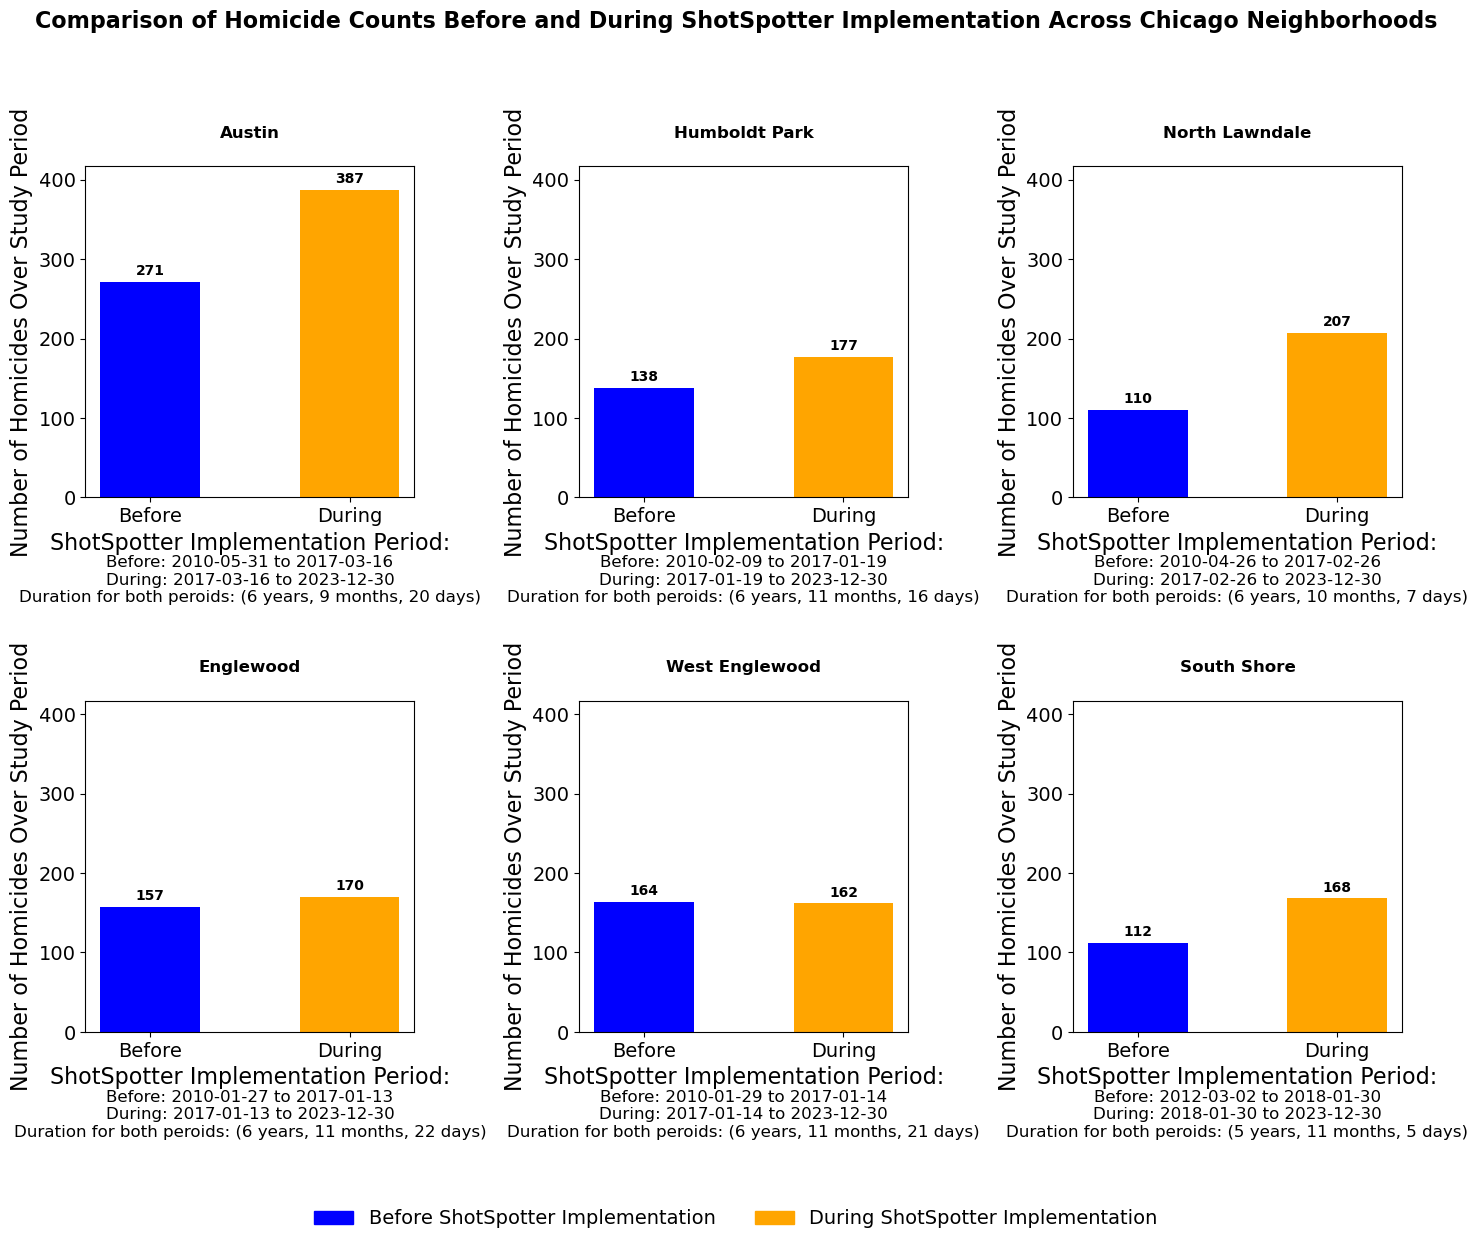

In [105]:
fig, axes = plt.subplots(2, 3, figsize=(15, 12))
axes = axes.flatten()

global_max = 0
for hood in selected_neighborhoods:
    dates = shot_dates.get(hood, None)
    if dates:
        start_date = dates['Start Date']
        first_shot_date = dates['First Shot Date']
        last_shot_date = dates['Last Shot Date']

        hood_data = crime_six_hoods[crime_six_hoods['Community'] == hood]

        before = hood_data[(hood_data['Date'] >= start_date) & (hood_data['Date'] < first_shot_date)]
        during = hood_data[(hood_data['Date'] >= first_shot_date) & (hood_data['Date'] <= last_shot_date)]

        before_count = before.shape[0]
        during_count = during.shape[0]

        global_max = max(global_max, before_count, during_count)

for idx, hood in enumerate(selected_neighborhoods):
    dates = shot_dates.get(hood, None)
    
    if dates:
        start_date = dates['Start Date']
        first_shot_date = dates['First Shot Date']
        last_shot_date = dates['Last Shot Date']
        duration_str = dates['Duration']

        hood_data = crime_six_hoods[crime_six_hoods['Community'] == hood]

        before = hood_data[(hood_data['Date'] >= start_date) & (hood_data['Date'] < first_shot_date)]
        during = hood_data[(hood_data['Date'] >= first_shot_date) & (hood_data['Date'] <= last_shot_date)]

        before_count = before.shape[0]
        during_count = during.shape[0]

        bars = axes[idx].bar(['Before', 'During'], [before_count, during_count], color=['blue', 'orange'], width=0.5)
        axes[idx].set_ylim(0, global_max + 30)
        axes[idx].set_ylabel('Number of Homicides Over Study Period')
        axes[idx].set_xlabel('ShotSpotter Implementation Period:')

        axes[idx].text(0.5, 1.1, hood, fontsize=12, fontweight='bold', ha='center', va='center', transform=axes[idx].transAxes)

        period_text = (
            f'Before: {start_date.date()} to {first_shot_date.date()}\n'
            f'During: {first_shot_date.date()} to {last_shot_date.date()}\n'
            f'Duration for both peroids: ({duration_str})'
        )
        axes[idx].text(0.5, -0.25, period_text, fontsize=12, ha='center', va='center', transform=axes[idx].transAxes)

        for bar, count in zip(bars, [before_count, during_count]):
            height = bar.get_height()
            axes[idx].text(bar.get_x() + bar.get_width() / 2, height + 5, f'{count}', 
                           ha='center', va='bottom', fontsize=10, fontweight='bold')

blue_patch = mpatches.Patch(color='blue', label='Before ShotSpotter Implementation')
orange_patch = mpatches.Patch(color='orange', label='During ShotSpotter Implementation')

fig.suptitle(
    'Comparison of Homicide Counts Before and During ShotSpotter Implementation Across Chicago Neighborhoods',
    fontsize=16, fontweight='bold'
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.legend(
    handles=[blue_patch, orange_patch],
    loc='lower center', ncol=2, frameon=False, fontsize=14, bbox_to_anchor=(0.5, -0.05)
)

plt.show()

filename = "homicide_comparison.png"
file_path = os.path.join(dir_path, filename)

fig.savefig(file_path, dpi=300, bbox_inches='tight')

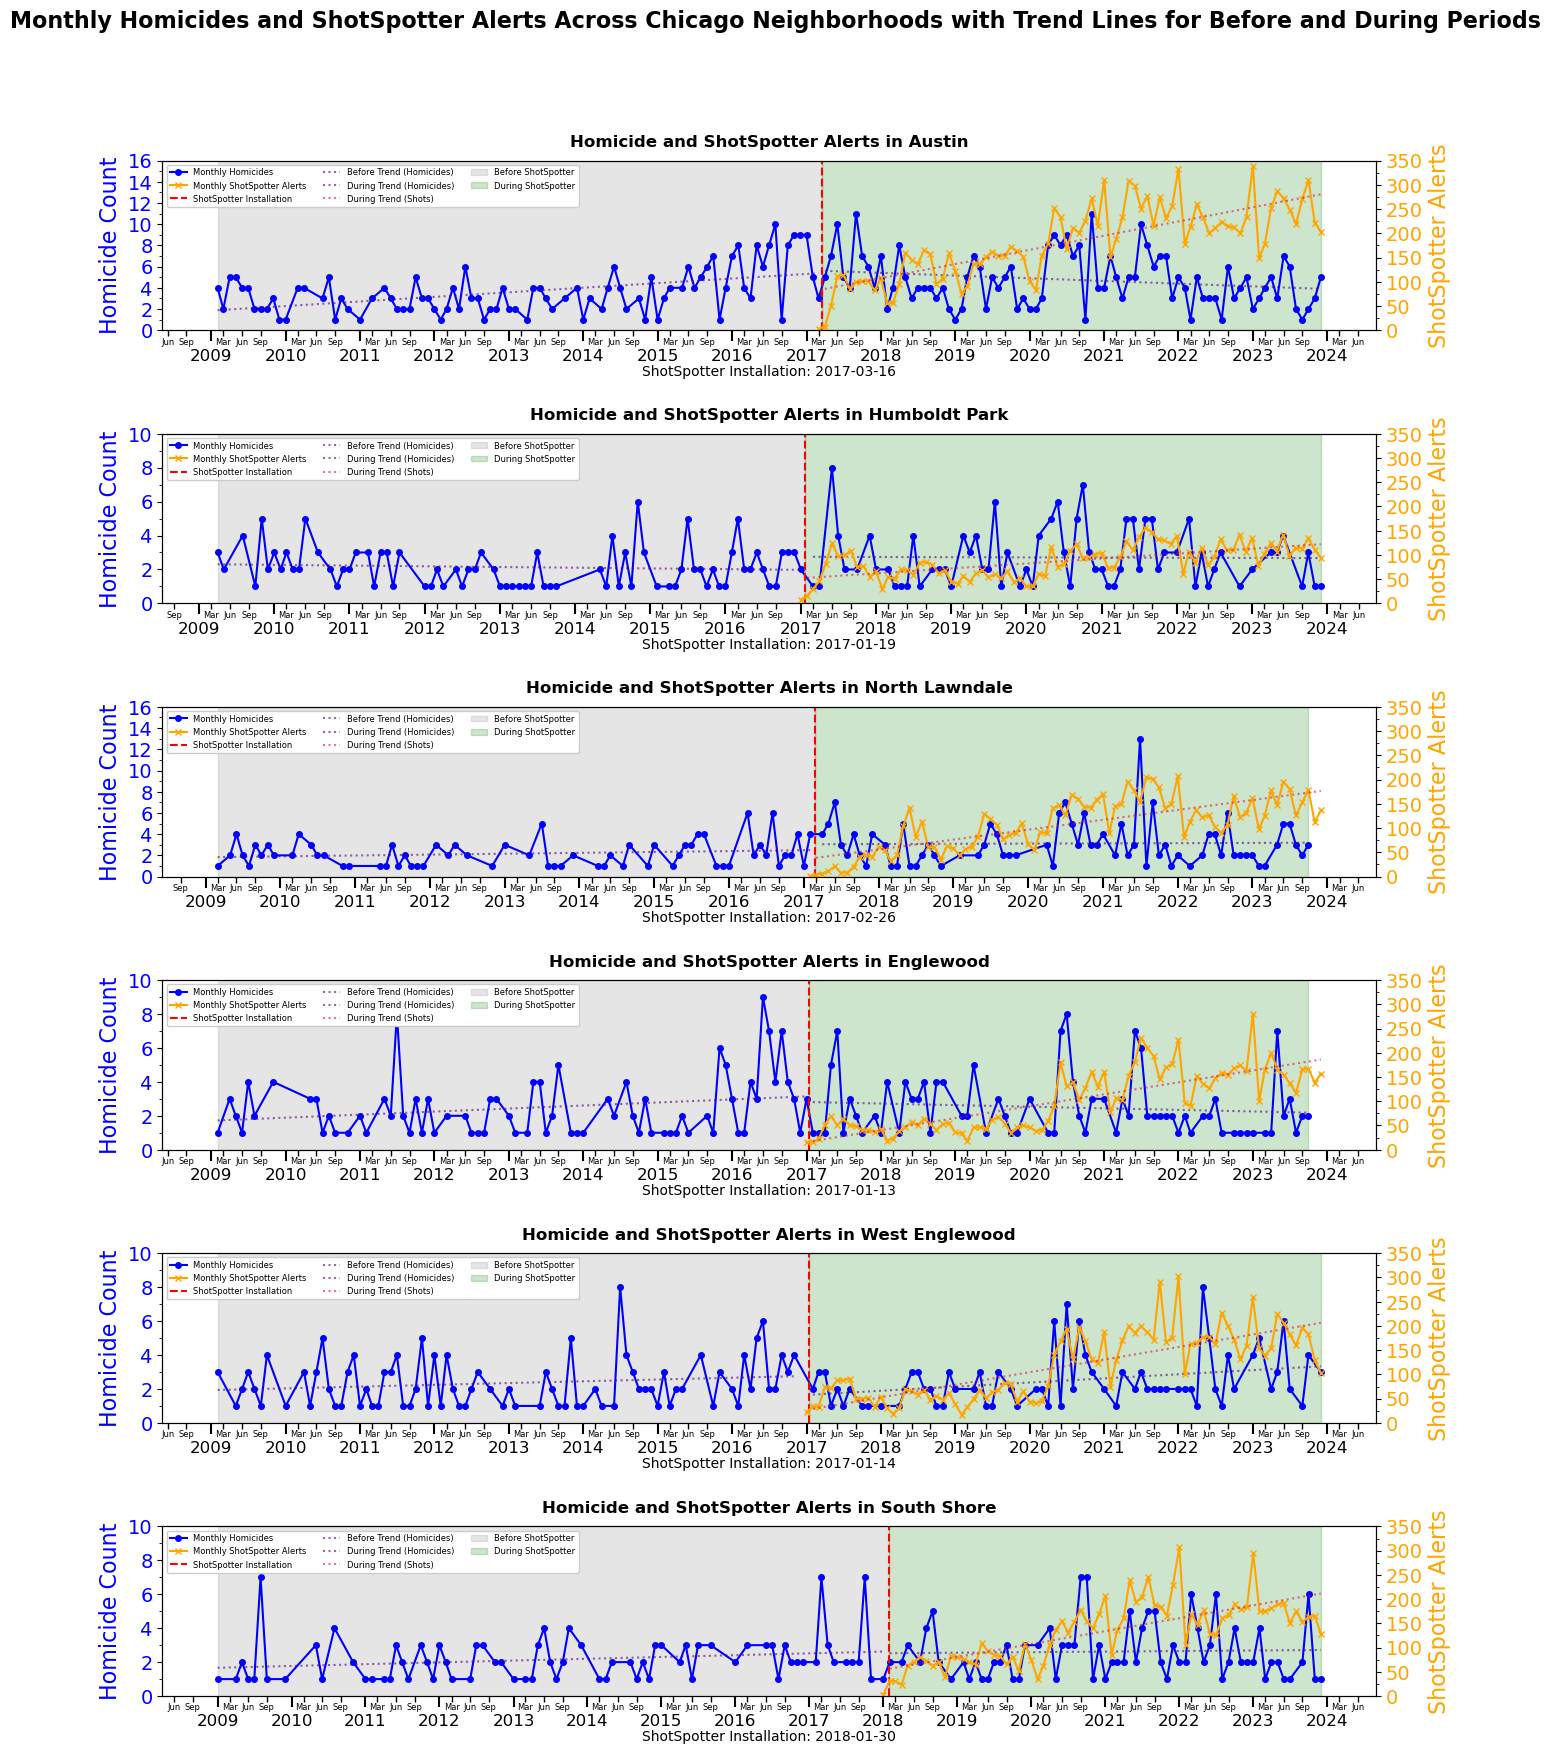

In [106]:
fig, axes = plt.subplots(6, 1, figsize=(14, 18))
axes = axes.flatten()

for ax in axes:
    ax.set_facecolor('white')

for idx, (neighborhood, dates) in enumerate(shot_dates.items()):
    
    start_date = dates['Start Date']
    first_shot_date = dates['First Shot Date']
    last_shot_date = dates['Last Shot Date']
    
    homicide_data = crime_six_hoods[crime_six_hoods['Community'] == neighborhood]
    monthly_homicides = (
        homicide_data.groupby(homicide_data['Date'].dt.to_period('M')).size().reset_index(name='Homicide Count')
    )
    monthly_homicides['Date'] = monthly_homicides['Date'].dt.to_timestamp()

    shotspotter_data = Shotspotter_six_hoods[Shotspotter_six_hoods['Community'] == neighborhood]
    monthly_shots = (
        shotspotter_data.groupby(shotspotter_data['Date'].dt.to_period('M')).size().reset_index(name='ShotSpotter Count')
    )
    monthly_shots['Date'] = monthly_shots['Date'].dt.to_timestamp()

    before_homicides = monthly_homicides[monthly_homicides['Date'] < first_shot_date].dropna()
    during_homicides = monthly_homicides[monthly_homicides['Date'] >= first_shot_date].dropna()

    before_shots = monthly_shots[monthly_shots['Date'] < first_shot_date].dropna()
    during_shots = monthly_shots[monthly_shots['Date'] >= first_shot_date].dropna()

    ax1 = axes[idx]
    ax1.plot(monthly_homicides['Date'], monthly_homicides['Homicide Count'], 
             marker='o', markersize=4, linestyle='-', color='blue', label='Monthly Homicides')
    ax1.set_ylabel('Homicide Count', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(monthly_shots['Date'], monthly_shots['ShotSpotter Count'], 
             marker='x', markersize=4, linestyle='-', color='orange', label='Monthly ShotSpotter Alerts')
    ax2.set_ylabel('ShotSpotter Alerts', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    for data, period, color in [(before_homicides, 'Before', 'indigo'), (during_homicides, 'During', 'indigo')]:
        if len(data) >= 3:
            x = mdates.date2num(data['Date'])
            y = data['Homicide Count']
            if np.any(y):
                z = np.polyfit(x, y, 1)
                p = np.poly1d(z)
                ax1.plot(data['Date'], p(x), linestyle=':', color=color, alpha=0.6, label=f'{period} Trend (Homicides)')

    for data, period, color in [(before_shots, 'Before', 'crimson'), (during_shots, 'During', 'crimson')]:
        if len(data) >= 3:
            x = mdates.date2num(data['Date'])
            y = data['ShotSpotter Count']
            if np.any(y):
                z = np.polyfit(x, y, 1)
                p = np.poly1d(z)
                ax2.plot(data['Date'], p(x), linestyle=':', color=color, alpha=0.6, label=f'{period} Trend (Shots)')

    ax1.axvline(x=first_shot_date, color='red', linestyle='--', label='ShotSpotter Installation')

    ax1.axvspan(monthly_homicides['Date'].min(), first_shot_date, alpha=0.2, color='grey', label='Before ShotSpotter')
    ax1.axvspan(first_shot_date, monthly_homicides['Date'].max(), alpha=0.2, color='green', label='During ShotSpotter')

    ax1.xaxis.set_major_locator(YearLocator(1))
    ax1.xaxis.set_minor_locator(MonthLocator([3, 6, 9]))
    ax1.xaxis.set_major_formatter(DateFormatter('%Y'))
    ax1.xaxis.set_minor_formatter(DateFormatter('%b'))

    ax1.tick_params(axis='x', which='major', length=8, width=1.5, labelsize=12, pad=5)
    ax1.tick_params(axis='x', which='minor', length=4, width=1, labelsize=6, pad=1, rotation=0)

    if neighborhood in ["Austin", "North Lawndale"]:
        ax1.set_ylim(0, 16)
        ax1.set_yticks(np.arange(0, 17, 2))
        ax1.set_yticks(np.arange(0, 17, 1), minor=True)
    else:
        ax1.set_ylim(0, 10)
        ax1.set_yticks(np.arange(0, 11, 2))
        ax1.set_yticks(np.arange(0, 11, 1), minor=True)

    ax2.set_ylim(0, 350)
    ax2.set_yticks(np.arange(0, 351, 50))
    ax2.set_yticks(np.arange(0, 351, 25), minor=True)

    ax1.set_title(f'Homicide and ShotSpotter Alerts in {neighborhood}', fontsize=12, weight='bold', pad=10)

    ax1.text(0.5, -0.2, f'ShotSpotter Installation: {first_shot_date.date()}', 
            transform=ax1.transAxes, ha='center', va='top', fontsize=10)

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    
    combined_lines = lines1 + lines2
    combined_labels = labels1 + labels2
    order = ['Monthly Homicides', 'Monthly ShotSpotter Alerts','ShotSpotter Installation', 
             'Before Trend (Homicides)', 'During Trend (Homicides)', 'During Trend (Shots)',
             'Before ShotSpotter', 'During ShotSpotter'
             ]
    
    ordered_indices = [combined_labels.index(label) for label in order if label in combined_labels]
    ordered_lines = [combined_lines[i] for i in ordered_indices]
    ordered_labels = [combined_labels[i] for i in ordered_indices]
    
    ax1.legend(ordered_lines, ordered_labels, loc='upper left', fontsize=6, frameon=True, framealpha=1, ncol=3)

fig.suptitle(
    'Monthly Homicides and ShotSpotter Alerts Across Chicago Neighborhoods with Trend Lines for Before and During Periods',
    fontsize=16, fontweight='bold'
)

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


filename = "Monlth_Homicide_ShotSpotter.png"
file_path = os.path.join(dir_path, filename)

fig.savefig(file_path, dpi=300, bbox_inches='tight')

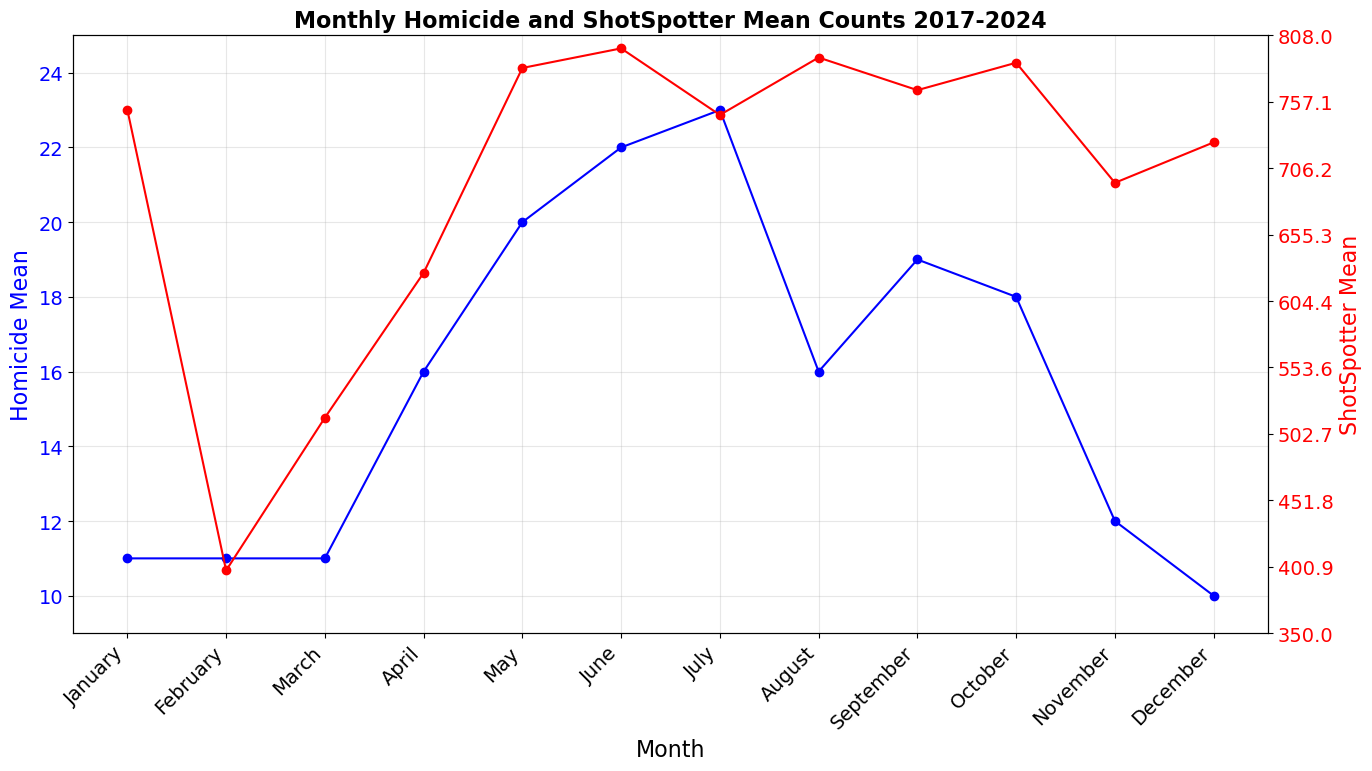

In [107]:
monthly_homicides = (
    crime_six_hoods[crime_six_hoods["Date"] >= "2017-01-13"]
    .groupby([crime_six_hoods["Date"].dt.to_period("M")])
    .size()
    .reset_index(name="Homicide Count")
)

monthly_homicides["Month"] = monthly_homicides["Date"].dt.month

monthly_homicides_mean = (
    monthly_homicides.groupby("Month")["Homicide Count"].mean().round().reset_index()
)

monthly_shots = (
    Shotspotter_six_hoods.groupby([Shotspotter_six_hoods["Date"].dt.to_period("M")])
    .size()
    .reset_index(name="ShotSpotter Count")
)

monthly_shots["Month"] = monthly_shots["Date"].dt.month

monthly_shots_mean = (
    monthly_shots.groupby("Month")["ShotSpotter Count"].mean().round().reset_index()
)

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.plot(monthly_homicides_mean["Month"], monthly_homicides_mean["Homicide Count"], marker='o', linestyle='-', color='blue', label='Homicide Mean')
ax1.set_xlabel('Month')
ax1.set_ylabel('Homicide Mean', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(np.arange(1, 13))
ax1.set_xticklabels(months, rotation=45, ha='right')
ax1.grid(alpha=0.3)

ax2 = ax1.twinx()
ax2.plot(monthly_shots_mean["Month"], monthly_shots_mean["ShotSpotter Count"], marker='o', linestyle='-', color='red', label='ShotSpotter Mean')
ax2.set_ylabel('ShotSpotter Mean', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.set_ylim(9, max(monthly_homicides_mean["Homicide Count"]) + 2)

shotspotter_min = 350
shotspotter_max = max(monthly_shots_mean["ShotSpotter Count"]) + 10
ax2.set_ylim(shotspotter_min, shotspotter_max)
ax2.set_yticks(np.linspace(shotspotter_min, shotspotter_max, 10))

plt.title("Monthly Homicide and ShotSpotter Mean Counts 2017-2024", fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()

filename = "Monthly_Homicide_and_ShotSpotter_Mean_Counts_2017_2024.png"
file_path = os.path.join(dir_path, filename)

fig.savefig(file_path, dpi=300, bbox_inches='tight')

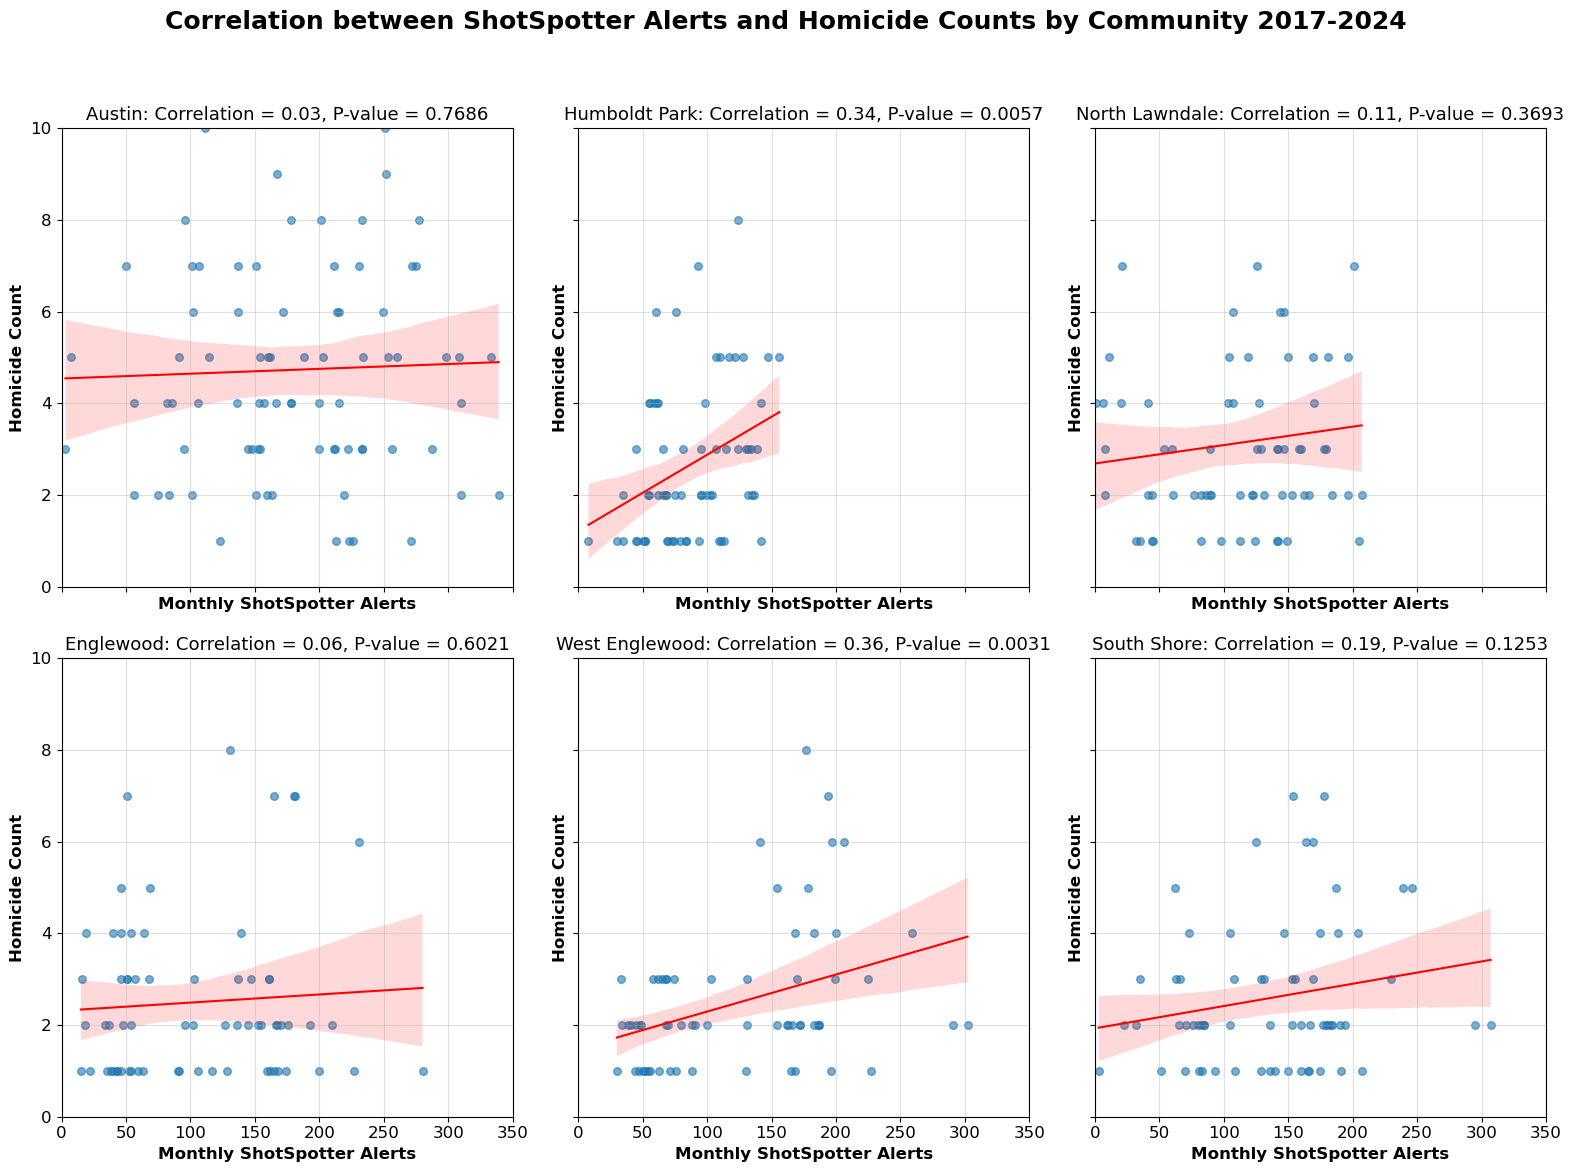

In [108]:
monthly_data = crime_six_hoods[crime_six_hoods["Date"] >= "2017-01-13"].groupby(['Community', 'Year', 'Month']).size().reset_index(name='Homicide Count')
shotspotter_data = Shotspotter_six_hoods.groupby(['Community', 'Year', 'Month']).size().reset_index(name='ShotSpotter Alerts')

correlation_data = pd.merge(monthly_data, shotspotter_data, on=['Community', 'Year', 'Month'], how='inner')

fig, axes = plt.subplots(2, 3, figsize=(16, 12), sharex=True, sharey=True)
fig.suptitle('Correlation between ShotSpotter Alerts and Homicide Counts by Community 2017-2024', fontsize=18, fontweight='bold')
axes = axes.flatten()

y_limits = (0, 10)
x_limits = (0, 350)

for idx, community in enumerate(selected_neighborhoods):

    community_data = correlation_data[correlation_data['Community'] == community]
    correlation, p_value = pearsonr(community_data['Homicide Count'], community_data['ShotSpotter Alerts'])

    sns.regplot(x='ShotSpotter Alerts', y='Homicide Count', data=community_data, ax=axes[idx],
                scatter_kws={'s': 30, 'alpha': 0.6}, line_kws={'color': 'red', 'lw': 1.5})
    axes[idx].set_title(f"{community}: Correlation = {correlation:.2f}, P-value = {p_value:.4f}", fontsize=13)
    axes[idx].set_xlim(x_limits)
    axes[idx].set_ylim(y_limits)
    axes[idx].grid(alpha=0.4)

    axes[idx].tick_params(axis='both', labelsize=12)
    axes[idx].set_xlabel('Monthly ShotSpotter Alerts', fontsize=12,  fontweight='bold')
    axes[idx].set_ylabel('Homicide Count', fontsize=12, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

filename = "Correlation_between_ShotSpotter_Alerts_and_Homicide_Counts_by_Community_2017_2024.png"
file_path = os.path.join(dir_path, filename)

fig.savefig(file_path, dpi=300, bbox_inches='tight')


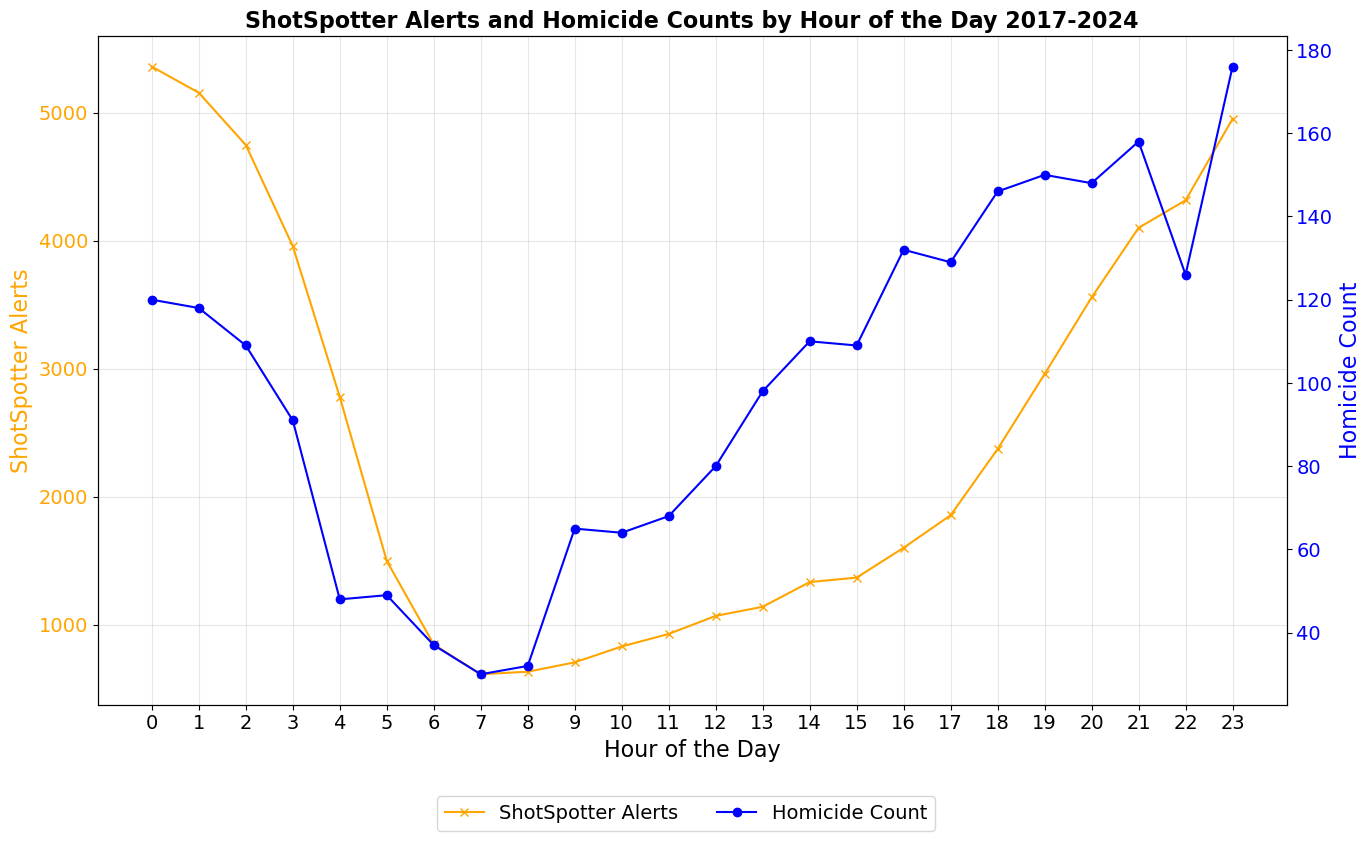

In [109]:
shotspotter_hourly = Shotspotter_six_hoods.groupby('Hour').size().reset_index(name='ShotSpotter Alerts')

homicide_hourly = crime_six_hoods.groupby('Hour').size().reset_index(name='Homicide Count')

fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.plot(shotspotter_hourly['Hour'], shotspotter_hourly['ShotSpotter Alerts'], marker='x', linestyle='-', color='orange', label='ShotSpotter Alerts')
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('ShotSpotter Alerts', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.grid(alpha=0.3)

ax2 = ax1.twinx()
ax2.plot(homicide_hourly['Hour'], homicide_hourly['Homicide Count'], marker='o', linestyle='-', color='blue', label='Homicide Count')
ax2.set_ylabel('Homicide Count', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
# Adjusted Legend Position
fig.legend(lines_1 + lines_2, labels_1 + labels_2, 
           loc='upper center', ncol=2, frameon=True, bbox_to_anchor=(0.5, -0.001))

plt.title('ShotSpotter Alerts and Homicide Counts by Hour of the Day 2017-2024', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Save with 300 dpi
filename = "ShotSpotter_Alerts_and_Homicide_Counts_by_Hour_of_the_Day_2017_2024.png"
file_path = os.path.join(dir_path, filename)
fig.savefig(file_path, dpi=300, bbox_inches='tight')